In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
df=pd.read_excel("Height-Width.xlsx")

# Data Analysis

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape

(3501, 2)

In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


# Visualization

Text(0.5, 1.0, 'Weight Plot')

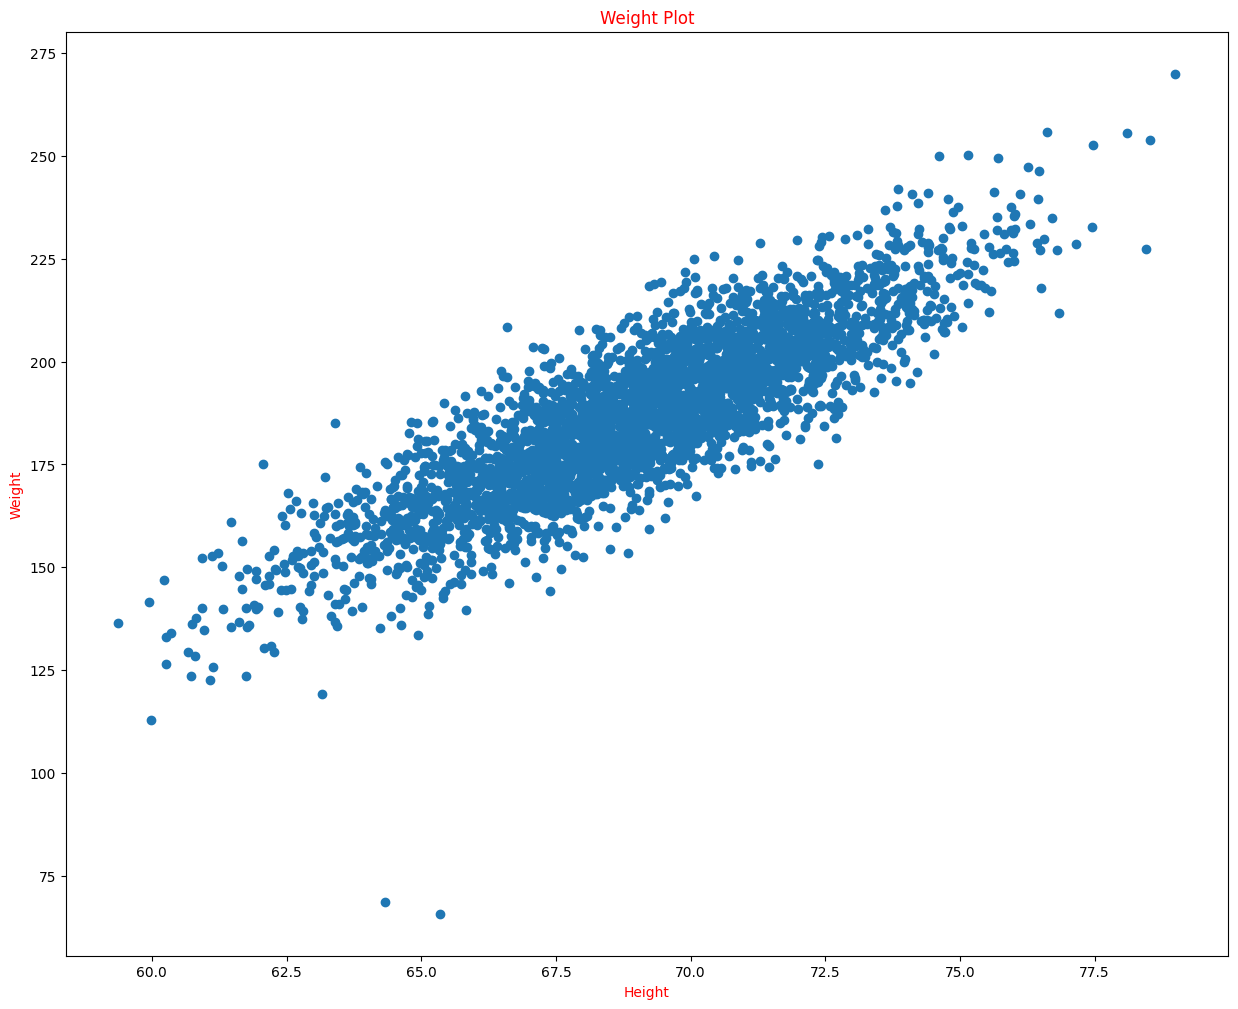

In [15]:
plt.figure(figsize=(15,12))
plt.scatter(df.Height,df.Weight)
plt.xlabel("Height",color="red")
plt.ylabel("Weight",color="red")
plt.title("Weight Plot",color="red")

In [12]:
x=df[["Height"]]

In [17]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [13]:
y=df["Weight"]

In [19]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split as tts

In [14]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=10)

In [22]:
xtrain.head()

,Height
2820,73.229116
1745,67.456272
945,69.549511
881,65.718179
675,64.506210


In [23]:
xtest.head()

,Height
1353,67.017486
1264,70.772165
1285,68.073849
188,65.755499
1739,69.762879


In [24]:
ytrain.head()

2820    210.545970
1745    166.390656
945     199.193815
881     155.175543
675     164.500367
Name: Weight, dtype: float64

In [25]:
ytest.head()

1353    183.381298
1264    204.439540
1285    185.533758
188     179.855690
1739    189.828313
Name: Weight, dtype: float64

In [26]:
import warnings
warnings.filterwarnings("ignore")

# Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
reg=LinearRegression()

In [15]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [30]:
m=reg.coef_
m

array([5.9630728])

In [31]:
c=reg.intercept_
c

-225.0922484638568

In [32]:
y=m*72+c

In [33]:
y

array([204.24899339])

In [34]:
reg.predict([[72]])

array([204.24899339])

In [35]:
pred=reg.predict(xtest)
pred

array([174.53790157, 196.92732109, 180.83706985, ..., 201.29850235,
       217.79720601, 188.63167465])

In [36]:
df["Predicted Result"]=reg.predict(x)

In [37]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.262890
1,68.781904,162.310473,185.059253
2,74.110105,212.740856,216.831705
3,71.730978,220.042470,202.644798
4,69.881796,206.349801,191.617988


# MSE, MAE

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mse=mean_squared_error(ytest,pred)
mse

107.67105202655728

In [40]:
mae=mean_absolute_error(ytest,pred)
mae

8.00779534151491

# Best Fit Line

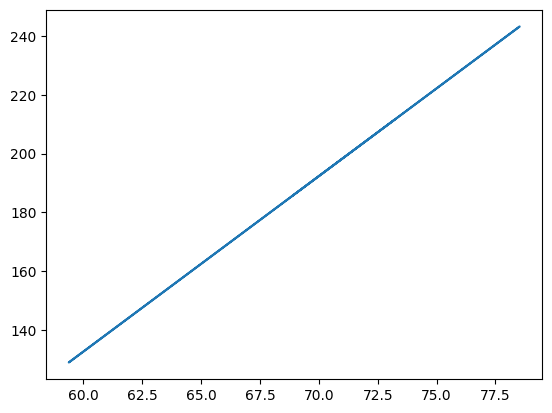

In [41]:
plt.plot(xtrain,reg.predict(xtrain))

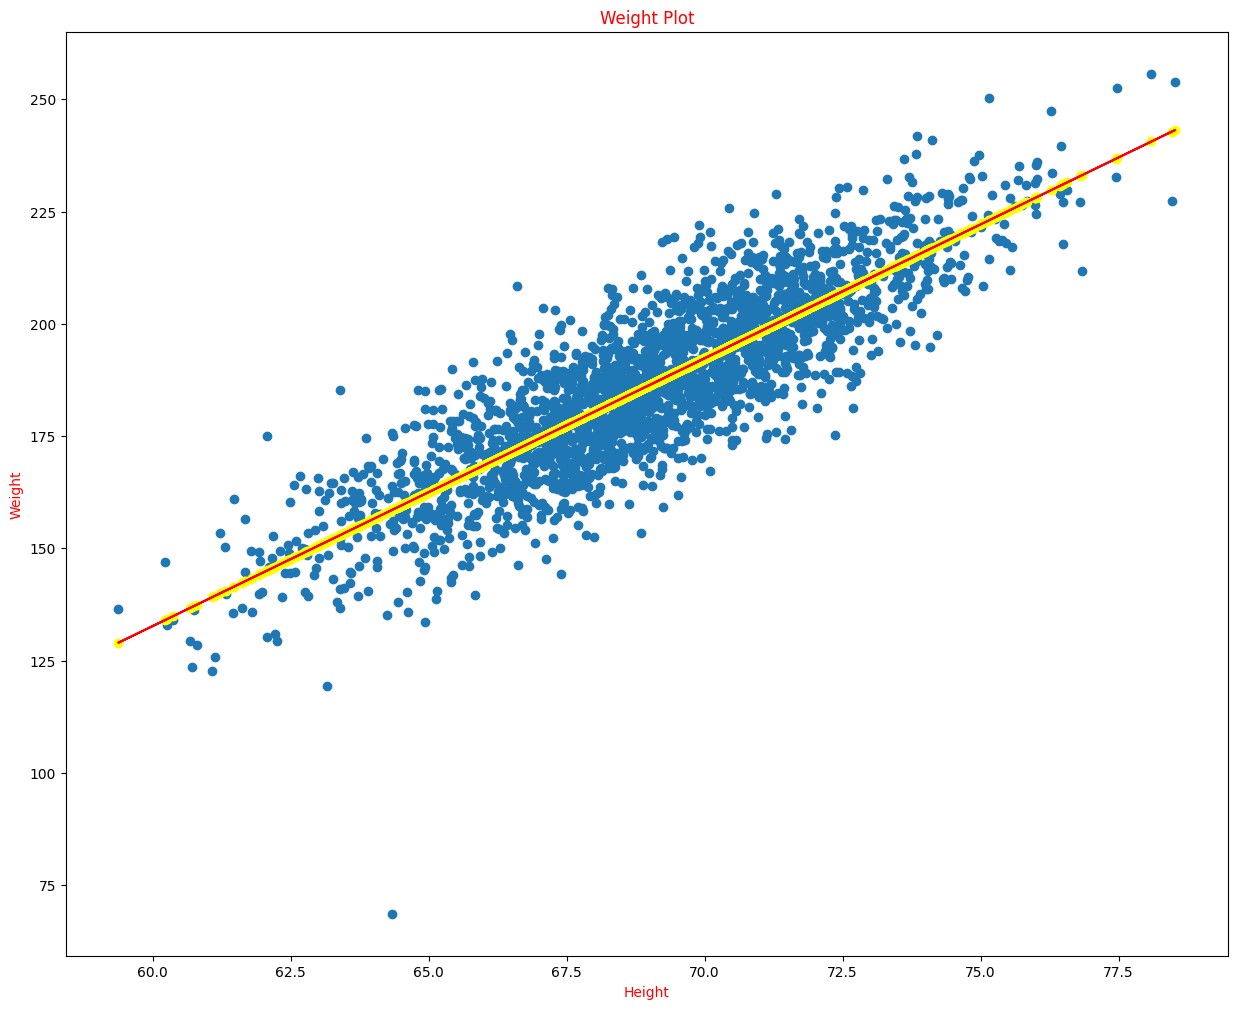

In [51]:
plt.figure(figsize=(15,12))
plt.xlabel("Height",color="red")
plt.ylabel("Weight",color="red")
plt.title("Weight Plot",color="red")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain),color="red")
plt.scatter(xtrain,reg.predict(xtrain),color="yellow")

# Accuracy

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(ytest,pred)

0.7328315355589521

# Save Model

In [54]:
import pickle as pk
import joblib as jb

In [55]:
pk.dump(reg,open("Rectangle","wb"))

In [56]:
reg2=pk.load(open("Rectangle","rb"))

In [57]:
reg2.predict([[73.847017]])

array([215.26289023])

In [58]:
jb.dump(reg,"Rectangle2")

['Rectangle2']